__JiaRui Shao__

In [6]:
#pandas
import pandas as pd
from pandas import DataFrame, Series
import datetime as dt
import numpy as np
import seaborn

import matplotlib.pyplot as plt
import seaborn as sns
#API
from pandas_datareader import data as wb
import pandas_datareader as pdr

Get the opening price from yahoo finance for the following stocks: Qualcomm and Intel (ticker symbols are QCOM and INTC) for the period starting 1/1/2017 and ending 12/31/2017. What is the highest, lowest, and average prices for these two stocks over this period? Also, plot the entire dataset in an appropriate plot. Calculate the monthly average of the opening price for QCOM. 

In [36]:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2017, 12, 31)
ticker=['QCOM', 'INTC']

In [37]:
f1=wb.DataReader('QCOM.US', 'quandl', start, end)
f1.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,64.36,64.65,64.00,64.02,4553732.0,0.0,1.0,64.36,64.65,64.00,64.02,4553732.0
2017-12-28,64.69,64.73,64.35,64.38,2371094.0,0.0,1.0,64.69,64.73,64.35,64.38,2371094.0
2017-12-27,64.32,64.64,64.18,64.54,4821727.0,0.0,1.0,64.32,64.64,64.18,64.54,4821727.0
2017-12-26,64.49,64.94,64.20,64.30,4185772.0,0.0,1.0,64.49,64.94,64.20,64.30,4185772.0
2017-12-22,64.31,64.98,64.30,64.73,4386678.0,0.0,1.0,64.31,64.98,64.30,64.73,4386678.0


In [11]:
f1["Open"].describe()

count    251.000000
mean      56.858845
std        4.813469
min       49.939999
25%       53.090000
50%       55.639999
75%       58.375000
max       68.599998
Name: Open, dtype: float64

In [17]:
f1['Date']=pd.to_datetime(f1['Date'])

In [18]:
month_group = f1.groupby(f1['Date'].dt.month)['Open'].mean()
print(month_group)

Date
1     62.019500
2     55.012106
3     57.446956
4     54.363158
5     55.959091
6     57.175000
7     54.863000
8     52.618695
9     51.443500
10    52.879091
11    64.113810
12    64.836499
Name: Open, dtype: float64


In [38]:
f2=wb.DataReader('INTC.US', 'quandl', start, end)
f2.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,46.21,46.49,46.09,46.16,17136416.0,0.0,1.0,46.21,46.49,46.09,46.16,17136416.0
2017-12-28,46.36,46.36,45.95,46.22,9279766.0,0.0,1.0,46.36,46.36,45.95,46.22,9279766.0
2017-12-27,46.11,46.36,46.00,46.11,12412977.0,0.0,1.0,46.11,46.36,46.00,46.11,12412977.0
2017-12-26,46.28,46.47,45.95,46.08,15477747.0,0.0,1.0,46.28,46.47,45.95,46.08,15477747.0
2017-12-22,46.33,47.02,46.02,46.70,33404280.0,0.0,1.0,46.33,47.02,46.02,46.70,33404280.0


In [14]:
f2["Open"].describe()

count    251.000000
mean      37.773745
std        3.715454
min       33.250000
25%       35.535000
50%       36.299999
75%       38.060000
max       47.540001
Name: Open, dtype: float64

In [39]:
data=pd.concat([f1['Open'], f2['Open']], axis=1,join='inner')
data.columns=['QCOM','INTC']
data.head()

,QCOM,INTC
Date,,
2017-12-29,64.36,46.21
2017-12-28,64.69,46.36
2017-12-27,64.32,46.11
2017-12-26,64.49,46.28
2017-12-22,64.31,46.33


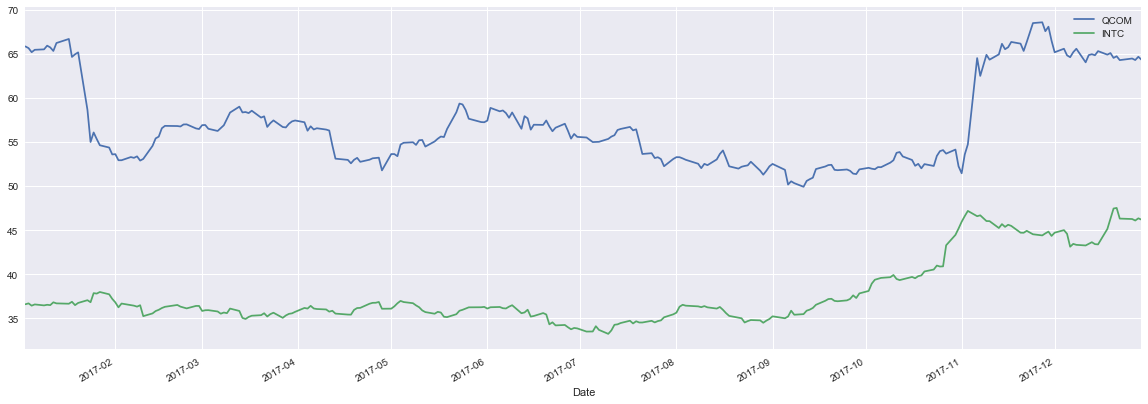

In [42]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(20,7))
data.plot(ax=ax)

Use this dataset on [2006 - 2011 NYS Math Test Results By Grade - School Level] to answer this question. This is from NYC Open Data. Display the average of the mean scale scores grouped by school (DBN) and Grade

In [44]:
data2=pd.read_csv('2006_-_2011_NYS_Math_Test_Results_By_Grade_-_School_Level_-_All_Students.csv', low_memory=False)
df=pd.DataFrame(data2, columns=['DBN','Grade','Mean Scale Score'])
df.head()

,DBN,Grade,Mean Scale Score
0,01M015,3,667.0
1,01M015,3,672.0
2,01M015,3,668.0
3,01M015,3,668.0
4,01M015,3,677.0


In [45]:
df.groupby(['DBN','Grade'])['Mean Scale Score'].mean()

DBN     Grade     
01M015  3             670.500000
        4             654.833333
        5             652.833333
        6             639.000000
        All Grades    669.000000
01M019  3             679.166667
        4             674.000000
        5             674.333333
        6             654.000000
        7                    NaN
        All Grades    683.000000
01M020  3             681.833333
        4             677.500000
        5             680.000000
        6             664.000000
        All Grades    682.000000
01M034  3             684.666667
        4             672.833333
        5             664.333333
        6             654.333333
        7             653.166667
        8             641.833333
        All Grades    673.000000
01M063  3             676.500000
        4             676.833333
        5             670.000000
        6             672.000000
        All Grades    689.000000
01M064  3             676.000000
        4             67

Use this dataset to answer this question. This is from NYC Open data. This data is on parking violations in January, February, and March in 2013. Display the top ten Registration States by number of violations. Show this as a plot as well. Plot the top five plate types by number of violations. 

In [56]:
data2=pd.read_csv('ParkingViolations-NYC-JanFebMar2013.csv', low_memory=False)
df2=pd.DataFrame(data2, columns=['Registration State','Plate Type'])
df2.head()


,Registration State,Plate Type
0,NY,COM
1,NY,COM
2,IL,PAS
3,NJ,PAS
4,NY,PAS


In [57]:
df3=df2['Registration State'].value_counts()[:10]
print(df3)

NY    1839
NJ     171
99     108
PA      59
FL      37
MA      29
CT      19
VA      19
AZ      14
NC      11
Name: Registration State, dtype: int64


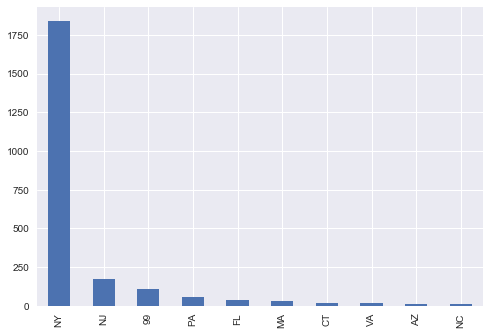

In [58]:
df3.plot.bar()

In [59]:
df4=df2['Plate Type'].value_counts()[:5]
print(df4)

PAS    1667
COM     564
999      94
SRF      63
OMR      14
Name: Plate Type, dtype: int64


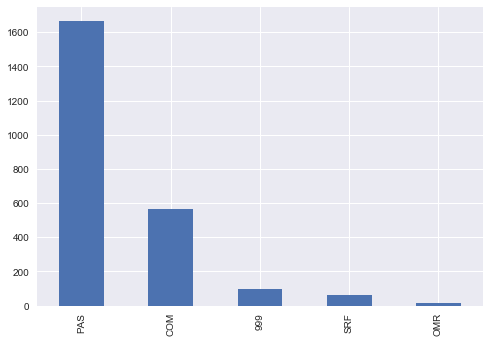

In [60]:
df4.plot.bar()

Scrape the website of the Journal of MIS for Volume 34 Number 2 2017 (http://www.jmis-web.org/issues/135) to get a list of titles of articles and the first authors published in this issue.  Add the article title and first author for all these published articles to a dictionary. Ask the user for keyword(s) they would like to search for. Check if the keyword(s) input by the user exists in any of the titles and display those titles that match the keyword search. Also, list of the first author for that article. 

In [61]:
import json
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests

r = requests.get('http://www.jmis-web.org/issues/135')
c=r.text
soup = BeautifulSoup(c, 'html.parser')

In [135]:
dt={}
y=soup.find_all('em')
count=0
for b in y:
    author=str(b.get_text())
    first_author=author.split(',',2)[:2]
    first_author=''.join(first_author)
    dt[count]=first_author
    count+=1
    
for key,value in dt.items():
    print (key,value)

0 Journal of Management Information Systems
1 
Zwass Vladimir 
2 
Clemons Eric K
3 
Gunarathne Priyanga
4 
Weber Thomas A 
5 
Karwatzki Sabrina
6 
Ge Ruyi
7 
Clemons Eric K
8 
Pinsonneault Alain
9 
Guo Shanshan
10 
Bala Hillol
11 
James Tabitha L
12 
Jensen Matthew L


In [136]:
dt1={}
x=soup.find_all('h4')
dcount=0
for a in x:
    dt1[a.get_text()]=dt[dcount]
    dcount+=1
for key,value in dt1.items():
    print (key,value)

Editorial Introduction Journal of Management Information Systems
Special Section: Technological Innovations for Communication and Collaboration in Social Spaces 
Zwass Vladimir 
Whose and What Social Media Complaints Have Happier Resolutions? Evidence from Twitter 
Clemons Eric K
Smart Products for Sharing 
Gunarathne Priyanga
Beyond the Personalization–Privacy Paradox: Privacy Valuation, Transparency Features, and Service Personalization 
Weber Thomas A 
Predicting and Deterring Default with Social Media Information in Peer-to-Peer Lending 
Karwatzki Sabrina
Understanding the Information-Based Transformation of Strategy and Society 
Ge Ruyi
Integrated Health Information Technology and the Quality of Patient Care: A Natural Experiment 
Clemons Eric K
How Doctors Gain Social and Economic Returns in Online Health-Care Communities: A Professional Capital Perspective 
Pinsonneault Alain
The Effects of Process Orientations on Collaboration Technology Use and Outcomes in Product Development 

In [93]:
mykeyword=input("What do you want to search for?")
for key,value in dt1.items():
    i=key.find(mykeyword)
    if (i!=-1):
        print(key,value.split(value,1)[1])

What do you want to search for?Special Section
Special Section: Technological Innovations for Communication and Collaboration in Social Spaces 
